In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
!ls

ARS DLR Data Set
DLR_dataset.ipynb
DLR_dataset.zip
DLR_preprocess.ipynb
DatasetPlotting_Mobi_SmartFall_Notch.ipynb
MobiAct_Dataset_v2.0
MobiAct_Dataset_v2.0.rar
MobiAct_preprocessed
MobiAct_preprocessed.zip
NotchDataset
Notch_Dataset.zip
SmartFall_Dataset
SmartFall_Dataset.zip
dlr_preprocessed
mobiact_dl_preprocessed
mobiact_dl_preprocessed.zip
mobiact_tft(v2).ipynb
outputs_mobiact(v2)
tFall_Dataset


In [4]:
data_dir = 'ARS DLR Data Set/'
os.listdir(data_dir)

['ARS_DLR_Data_Set_Readme.txt',
 'DLR_dataset',
 'Subjects_Age_Height_Gender.xls',
 '.DS_Store',
 '4th_Quantization_AOOG_Individual_Training_4XValidation',
 'ARS_DLR_DataSet.mat',
 '4th_Quantization_AOOG_General_Training_4XValidation',
 '4th_Quantization_AOOG_Tests_People',
 'ARS_DLR_Data_Set_V2_Readme.txt',
 'DLR_dataset.zip',
 'ARS_DLR_Benchmark_Data_Set.mat',
 'ARS_DLR_DataSet_V2.mat',
 'ARS_DLR_Benchmark_Data_Set_Readme.txt',
 '.ipynb_checkpoints',
 'QuantizationFiles.zip']

# mat data into csv files

## Benchmark dataset

In [5]:
file = open(data_dir + 'ARS_DLR_Benchmark_Data_Set_Readme.txt', 'r', encoding='latin1')
strings = file.readlines()
file.close()
for s in strings:
    print(s)

Activity Recognition System Benchmark Data

 



This is the explanation of the contents of the MATLAB file ARS_DLR_Benchmark_Data_Set.mat:





1.- The name of every cell contained in this MATLAB file is composed by:



ARS_[name]_[Benchmark]_[otherinformation]



where,



- ARS corresponds to "Activity Recognition System".

- [name] corresponds to the person who did the test.

- [otherinformation] could be the name of the test, the sensor position, the activity... Any kind of information.





2.- Every cell named as before has four positions:



	ARS_Name_Otherinformation{1} contains a matrix of double data with the measurements from the accelerometers, gyroscopes and magnetometers of the IMU.



	ARS_Name_Otherinformation{2} contains a matrix of double data with the direction cosine matrix extracted from the sensor.



	ARS_Name_Otherinformation{3} is a cell array where the identifiers of the activities realized in that log are included.



	ARS_Name_Otherinformation{4} is a vecto

In [6]:
from scipy import io
matfile = io.loadmat(data_dir + 'ARS_DLR_Benchmark_Data_Set.mat')
matfile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ARS_Paula_Benchmark_Sensor_Left', 'ARS_Sinja_Benchmark_Sensor_Left', 'ARS_Emil_Benchmark_Sensor_Right'])

In [7]:
file_names = []
for name in list(matfile.keys()):
    if name.startswith('ARS'):
        file_names.append(name)
file_names

['ARS_Paula_Benchmark_Sensor_Left',
 'ARS_Sinja_Benchmark_Sensor_Left',
 'ARS_Emil_Benchmark_Sensor_Right']

In [8]:
columns = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z']
save_path = 'DLR_dataset/'
for file in file_names:
    temp = matfile[name]
    
    label = temp[0][2][0]
    label_idx = temp[0][3][0]
    
    sensor_data = pd.DataFrame(temp[0][0], columns=columns)
    sensor_data['labels'] = 0
    for i in range(len(label)):
        start = label_idx[i * 2] - 1
        end = label_idx[(i * 2) + 1] - 1
        sensor_data.loc[start:end, 'labels'] = str(label[i].item())
    indexNames = sensor_data[sensor_data['labels'] == 0].index
    # Delete these row indexes from dataFrame
    sensor_data.drop(indexNames , inplace=True)
    sensor_data.to_csv(data_dir + save_path + file + '.csv')

### Example

In [9]:
ex = matfile[file_names[0]]

label = ex[0][2][0]
label_idx = ex[0][3][0]
print(label_idx)
columns = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z']
sensor_train = pd.DataFrame(ex[0][0], columns=columns)

sensor_train['labels'] = 0 
for i in range(len(label)):
    start = label_idx[i * 2] - 1
    end = label_idx[(i * 2) + 1] - 1
    sensor_train.loc[start:end, 'labels'] = str(label[i].item())

[    1  1747  1748  1828  1829  3896  3897  4131  4132  4937  5369  6683
  6684  6793  7375  8116  8117  8256  8257 10219 10220 10337 10338 10800
 10801 11329 11330 12467 12468 12592 12593 13770 13771 14168 14169 15984
 15985 16269 16270 17089]


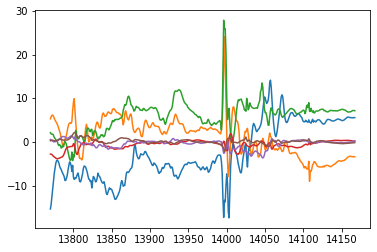

In [12]:
plt_ex = sensor_train[sensor_train['labels'] == 'FALLING']

plt.plot(plt_ex['acc_x'])
plt.plot(plt_ex['acc_y'])
plt.plot(plt_ex['acc_z'])
plt.plot(plt_ex['gyro_x'])
plt.plot(plt_ex['gyro_y'])
plt.plot(plt_ex['gyro_z'])

## Dataset V1

In [13]:
file = open(data_dir + 'ARS_DLR_Data_Set_Readme.txt', 'r', encoding='latin1')
strings = file.readlines()
file.close()
for s in strings:
    print(s)

Activity Recognition System Data set 

 



This is the explanation of the contents of the MATLAB file ARS_DLR_DataSet.mat:





1.- The name of every cell contained in this MATLAB file is composed by:



ARS_[name]_[otherinformation]



where,



- ARS corresponds to "Activity Recognition System".

- [name] corresponds to the person who did the test.

- [otherinformation] could be the name of the test, the sensor position, the activity... Any kind of information.





2.- Every cell named as before has four positions:



	ARS_Name_Otherinformation{1} contains a matrix of double data with the measurements from the accelerometers, gyroscopes and magnetometers of the IMU.



	ARS_Name_Otherinformation{2} contains a matrix of double data with the direction cosine matrix extracted from the sensor.



	ARS_Name_Otherinformation{3} is a cell array where the identifiers of the activities realized in that log are included.



	ARS_Name_Otherinformation{4} is a vector with indexes for the matri

In [14]:
matfile = io.loadmat(data_dir + 'ARS_DLR_DataSet.mat')
matfile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ARS_Maria_Real_Sitting_Heading_2', 'ARS_Maria_Real_Sitting_Heading_3', 'ARS_Maria_Real_Sitting_Heading_4', 'ARS_Maria_FLGUp1', 'ARS_Maria_FLGUp2', 'ARS_Maria_FLGUp3', 'ARS_Maria_FLGUp4', 'ARS_Maria_Jump', 'ARS_Cristina_Test_4_Sensor_Left', 'ARS_Cristina_Test_5_Sensor_Left', 'ARS_Cristina_Test_2_Sensor_Left', 'ARS_Cristina_Test_3_Sensor_Left', 'ARS_Cristina_Test_1_Sensor_Left', 'ARS_Elena_Test_1_Sensor_Right', 'ARS_Elena_Test_2_Sensor_Right', 'ARS_Elena_Test_3_Sensor_Right', 'ARS_Elena_Test_4_Sensor_Right', 'ARS_Elena_Test_5_Sensor_Right', 'ARS_Elena_Walking', 'ARS_Fabian_Test_1_Sensor_Right', 'ARS_Fabian_Test_2_Sensor_Right', 'ARS_Fabian_Test_3_Sensor_Right', 'ARS_Fabian_Test_4_Sensor_Right', 'ARS_Fabian_Test_5_Sensor_Right', 'ARS_Jesus_Test_1_Sensor_Right', 'ARS_Jesus_Test_2_Sensor_Right', 'ARS_Jesus_Test_3_Inverse_Sensor_Right', 'ARS_Jesus_Test_4_Sensor_Right', 'ARS_Jesus_Test_5_Sensor_Right', 'ARS_Korbinian_Test_1_Sensor_Right'

In [15]:
file_names = []
for name in list(matfile.keys()):
    if name.startswith('ARS'):
        file_names.append(name)
file_names[:5]

['ARS_Maria_Real_Sitting_Heading_2',
 'ARS_Maria_Real_Sitting_Heading_3',
 'ARS_Maria_Real_Sitting_Heading_4',
 'ARS_Maria_FLGUp1',
 'ARS_Maria_FLGUp2']

In [16]:
columns = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z']
save_path = 'DLR_dataset/'
for file in file_names:
    temp = matfile[name]
    
    label = temp[0][2][0]
    label_idx = temp[0][3][0]
    
    sensor_data = pd.DataFrame(temp[0][0], columns=columns)
    sensor_data['labels'] = 0
    for i in range(len(label)):
        start = label_idx[i * 2] - 1
        end = label_idx[(i * 2) + 1] - 1
        sensor_data.loc[start:end, 'labels'] = str(label[i].item())
    indexNames = sensor_data[sensor_data['labels'] == 0].index
    # Delete these row indexes from dataFrame
    sensor_data.drop(indexNames , inplace=True)
    sensor_data.to_csv(data_dir + save_path + file + '.csv')

## Dataset V2

In [17]:
file = open(data_dir + 'ARS_DLR_Data_Set_V2_Readme.txt', 'r', encoding='latin1')
strings = file.readlines()
file.close()
for s in strings:
    print(s)

Activity Recognition System Data set 

 



This is the explanation of the contents of the MATLAB file ARS_DLR_DataSet_V2.mat:





1.- The name of every cell contained in this MATLAB file is composed by:



ARS_[name]_[otherinformation]



where,



- ARS corresponds to "Activity Recognition System".

- [name] corresponds to the person who did the test.

- [otherinformation] could be the name of the test, the sensor position, the activity... Any kind of information.





2.- Every cell named as before has four positions:



	ARS_Name_Otherinformation{1} contains a matrix of double data with the measurements from the accelerometers, gyroscopes and magnetometers of the IMU.



	ARS_Name_Otherinformation{2} contains a matrix of double data with the direction cosine matrix extracted from the sensor.



	ARS_Name_Otherinformation{3} is a cell array where the identifiers of the activities realized in that log are included.



	ARS_Name_Otherinformation{4} is a vector with indexes for the ma

In [18]:
matfile = io.loadmat(data_dir + 'ARS_DLR_DataSet_V2.mat')
matfile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ARS_Maria_Transitions_Up_Down_Sensor_Left', 'ARS_Cristina_Test_JmpFall_Sensor_Right', 'ARS_Cristina_Test_StSit_Sensor_Right', 'ARS_Hanno_Test_JmpFall_Sensor_Right', 'ARS_Hanno_Test_StSit_Sensor_Right', 'ARS_Hanno_Test_WkRun_Sensor_Right', 'ARS_Maria_Test_JmpFall_Sensor_Left', 'ARS_Maria_Test_StSit_Sensor_Left', 'ARS_Maria_Test_WkRun_Sensor_Left', 'ARS_Marina_Test_WkRun_Sensor_Right', 'ARS_Marina_Test_Fall_Sensor_Right', 'ARS_Marina_Test_JmpFall_Sensor_Right', 'ARS_Matthias_Test_StSit_Sensor_Right', 'ARS_Matthias_Test_JmpFall_Sensor_Right', 'ARS_Patrick_Test_JmpFall_Sensor_Right', 'ARS_Patrick_Test_StSit_Sensor_Right', 'ARS_Martin_Test_JmpFall_Sensor_Left', 'ARS_Martin_Test_StSit_Sensor_Left', 'ARS_Patrick_Test_WkRun_Sensor_Right', 'ARS_Susanna_Test_JmpFall_Sensor_Left', 'ARS_Susanna_Test_StSit_Sensor_Left', 'ARS_Thomas_Test_JmpFall_Sensor_Left', 'ARS_Thomas_Test_StSit_Sensor_Left', 'ARS_Cristina_Test_WkRun_Sensor_Right', 'ARS_Mart

In [19]:
file_names = []
for name in list(matfile.keys()):
    if name.startswith('ARS'):
        file_names.append(name)
file_names[:5]

['ARS_Maria_Transitions_Up_Down_Sensor_Left',
 'ARS_Cristina_Test_JmpFall_Sensor_Right',
 'ARS_Cristina_Test_StSit_Sensor_Right',
 'ARS_Hanno_Test_JmpFall_Sensor_Right',
 'ARS_Hanno_Test_StSit_Sensor_Right']

In [20]:
columns = ['time', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z']
save_path = 'DLR_dataset/'
for file in file_names:
    temp = matfile[name]
    
    label = temp[0][2][0]
    label_idx = temp[0][3][0]
    
    sensor_data = pd.DataFrame(temp[0][0], columns=columns)
    sensor_data['labels'] = 0
    for i in range(len(label)):
        start = label_idx[i * 2] - 1
        end = label_idx[(i * 2) + 1] - 1
        sensor_data.loc[start:end, 'labels'] = str(label[i].item())
    indexNames = sensor_data[sensor_data['labels'] == 0].index
    # Delete these row indexes from dataFrame
    sensor_data.drop(indexNames , inplace=True)
    sensor_data.to_csv(data_dir + save_path + file + '.csv')

# DLR Dataset Preprocessing

In [21]:
data_dir = 'ARS DLR Data Set/DLR_dataset/'
file_list = os.listdir(data_dir)
file_list[:5]

['ARS_Korbinian_Test_2_Sensor_Right.csv',
 'ARS_Maria_Real_Lying.csv',
 'ARS_Hanno_Test_StSit_Sensor_Right.csv',
 'ARS_Maria_Falling_Sited_Heading_1.csv',
 'ARS_Elena_Test_2_Sensor_Right.csv']

In [22]:
per_info = pd.read_excel('ARS DLR Data Set/Subjects_Age_Height_Gender.xls')
per_info.head()

,Name,Age,Height,Gender,Unnamed: 4,Unnamed: 5
0,Marina,24.0,1.66,Female,NaN,NaN
1,Maria,25.0,1.61,Female,NaN,NaN
2,Elena,23.0,1.70,Female,NaN,NaN
3,Cristina,27.0,1.60,Female,NaN,NaN
4,Susanna,41.0,1.61,Female,NaN,NaN


In [23]:
ex = pd.read_csv(data_dir + file_list[0],index_col=0)
name = file_list[0].split('_')[1]
print(per_info[per_info['Name'] == name].index.values[0])
print(per_info[per_info['Name'] == name].Gender.values[0])
print(name)
ex.head()

8
Male
Korbinian


,time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,labels
0,17.15,-9.702358,0.020635,1.674165,0.013820,-0.013123,0.016836,1.273326,0.392144,0.312653,STNDING
1,17.16,-9.707232,0.025566,1.666926,0.004869,-0.003397,0.015052,1.267351,0.391066,0.307638,STNDING
2,17.17,-9.702337,0.011063,1.664216,-0.014894,-0.007078,0.016662,1.270401,0.394067,0.311236,STNDING
3,17.18,-9.692591,0.020641,1.671842,-0.007739,-0.015927,0.018439,1.270320,0.389785,0.311519,STNDING
4,17.19,-9.680356,-0.003477,1.661697,-0.005921,0.001813,0.018580,1.271230,0.391007,0.312000,STNDING


In [24]:
per_act_cnt = dict()
for file in file_list:
    per_name = file.split('_')[1]
    if per_name not in per_act_cnt:
        per_act_cnt[per_name] = 1
    else:
        val = per_act_cnt[per_name]
        per_act_cnt[per_name] = val + 1
print(per_act_cnt)
print(sum(per_act_cnt.values()))

{'Korbinian': 5, 'Maria': 29, 'Hanno': 3, 'Elena': 6, 'Michael': 5, 'Patrick': 3, 'Matthias': 3, 'Martin': 3, 'Fabian': 5, 'Thomas': 3, 'Susanna': 3, 'Christine': 3, 'Marina': 3, 'Jesus': 5, 'Cristina': 8, 'Emil': 1, 'Mohammed': 3, 'Paula': 1, 'Sinja': 1}
93


In [25]:
fall_names = dict()
for file in file_list:
    if 'Fall' in file:
        name = file.split('_')[1]
        if name in fall_names:
            val = fall_names[name]
            fall_names[name] = val + 1
        else:
            fall_names[name] = 1
print(fall_names, len(fall_names))

{'Maria': 5, 'Matthias': 1, 'Susanna': 1, 'Marina': 2, 'Hanno': 1, 'Cristina': 1, 'Mohammed': 1, 'Christine': 1, 'Patrick': 1, 'Martin': 1, 'Thomas': 1} 11


In [26]:
per_info = pd.read_excel('ARS DLR Data Set/Subjects_Age_Height_Gender.xls')
names = per_info['Name']
idx = list()
for name in list(fall_names.keys()):
    cond = per_info['Name'] == name
    idx.append(per_info.index[cond][0])
print(idx)
nofall_names = per_info.drop(per_info.index[idx])
nofall_names

[1, 14, 4, 0, 13, 3, 6, 5, 7, 15, 11]


,Name,Age,Height,Gender,Unnamed: 4,Unnamed: 5
2,Elena,23.0,1.70,Female,NaN,NaN
8,Korbinian,29.0,1.65,Male,NaN,NaN
9,Jesus,27.0,1.81,Male,NaN,NaN
10,Fabian,27.0,1.82,Male,NaN,NaN
12,Michael,NaN,NaN,Male,NaN,NaN
16,Paula,29.0,1.68,Female,NaN,NaN
17,Sinja,29.0,1.68,Female,NaN,NaN
18,Emil,23.0,1.70,Male,NaN,NaN


In [10]:
per_info

,Name,Age,Height,Gender,Unnamed: 4,Unnamed: 5
0,Marina,24.0,1.66,Female,NaN,NaN
1,Maria,25.0,1.61,Female,NaN,NaN
2,Elena,23.0,1.70,Female,NaN,NaN
3,Cristina,27.0,1.60,Female,NaN,NaN
4,Susanna,41.0,1.61,Female,NaN,NaN
5,Christine,52.0,1.64,Female,NaN,NaN
6,Mohammed,31.0,1.80,Male,NaN,~
7,Patrick,43.0,1.70,Male,NaN,NaN
8,Korbinian,29.0,1.65,Male,NaN,NaN
9,Jesus,27.0,1.81,Male,NaN,NaN


In [38]:
from tqdm.notebook import tqdm
train, valid, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
act_info = list()
for file in tqdm(file_list):
    per_name = file.split('_')[1]
#     print(per_name)
    per_idx = per_info[per_info['Name'] == per_name].index.values[0]
#     print(per_idx)
    per_age = per_info[per_info['Name'] == per_name].Age.values[0]
    per_height = per_info[per_info['Name'] == per_name].Height.values[0]
    per_gender = per_info[per_info['Name'] == per_name].Gender.values[0]
    
    data = pd.read_csv(data_dir + file, index_col=0)
    data['per_name'] = per_name
    data['per_idx'] = per_idx
    data['per_age'] = per_age
    data['per_height'] = per_height
    data['per_gender'] = per_gender
    act_info.extend(list((set(data['labels']))))
                    
    if per_name == 'Maria' or per_name == 'Matthias' or per_name == 'Susanna' or per_name == 'Marina' or per_name == 'Hanno' or per_name == 'Emil' or per_name == 'Korbinian' or per_name == 'Jesus' or per_name == 'Fabian' or per_name == 'Michael':
        train = pd.concat([train, data], axis=0)
    elif per_name == 'Cristina' or per_name == 'Mohammed' or per_name == 'Christine' or per_name == 'Paula':
        valid = pd.concat([valid, data], axis=0)
    else:
#         print(per_name)
        test = pd.concat([test, data], axis=0)

In [40]:
train.head()

,time,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,labels,per_name,per_idx,per_age,per_height,per_gender
0,17.15,-9.702358,0.020635,1.674165,0.013820,-0.013123,0.016836,1.273326,0.392144,0.312653,STNDING,Korbinian,8,29.0,1.65,Male
1,17.16,-9.707232,0.025566,1.666926,0.004869,-0.003397,0.015052,1.267351,0.391066,0.307638,STNDING,Korbinian,8,29.0,1.65,Male
2,17.17,-9.702337,0.011063,1.664216,-0.014894,-0.007078,0.016662,1.270401,0.394067,0.311236,STNDING,Korbinian,8,29.0,1.65,Male
3,17.18,-9.692591,0.020641,1.671842,-0.007739,-0.015927,0.018439,1.270320,0.389785,0.311519,STNDING,Korbinian,8,29.0,1.65,Male
4,17.19,-9.680356,-0.003477,1.661697,-0.005921,0.001813,0.018580,1.271230,0.391007,0.312000,STNDING,Korbinian,8,29.0,1.65,Male


In [45]:
train.to_csv('dlr_preprocessed/train.csv')
valid.to_csv('dlr_preprocessed/valid.csv')
test.to_csv('dlr_preprocessed/test.csv')